In [96]:
from tensorflow.keras.layers import Input, DepthwiseConv2D, \
     Conv2D, BatchNormalization, ReLU, AvgPool2D, Flatten, Dense

def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

INPUT_SHAPE = 224, 224, 3

input = Input(INPUT_SHAPE)
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

x = mobilenet_block(x, filters=64, strides=1)

x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)

x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)

x = mobilenet_block(x, filters=512, strides=2)
for _ in range(5):
    x = mobilenet_block(x, filters=512, strides=1)
  
x = mobilenet_block(x, filters=1024, strides=2)
x = mobilenet_block(x, filters=1024, strides=1)

x = AvgPool2D(pool_size=7, strides=1)(x)
output = Dense(units=1000, activation='softmax')(x)

from tensorflow.keras import Model

model = Model(inputs=input, outputs=output)

In [97]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import cv2
import glob as gb
import tensorflow as tf
import keras

In [62]:
trainpath = 'fire_images'
testpath = 'test'

In [73]:
for folder in  os.listdir(trainpath) : 
    files = gb.glob(str('/Users/moham/fire_images/' +folder + '/*' ) )
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 650 in folder fire
For training data , found 200 in folder non_fire_images


In [74]:
for folder in  os.listdir(testpath ) : 
    files = gb.glob(str('/Users/moham/test/' +folder + '/*' ) )
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 105 in folder fire
For testing data , found 44 in folder no_fire


In [83]:
code = {'fire':0 ,'non_fire_images':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [76]:
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(str('/Users/moham/fire_images/' +folder + '/*' ) )
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(720, 1280, 3)     18
(338, 600, 3)      18
(400, 600, 3)      16
(619, 1100, 3)     14
(405, 720, 3)      13
                   ..
(3500, 5680, 3)     1
(252, 448, 3)       1
(501, 890, 3)       1
(1706, 2560, 3)     1
(367, 385, 3)       1
Length: 531, dtype: int64

In [77]:
size = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(str('/Users/moham/test/' +folder + '/*' ) )
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(720, 1280, 3)     8
(360, 640, 3)      5
(401, 534, 3)      3
(1000, 1910, 3)    2
(800, 1200, 3)     2
                  ..
(451, 639, 3)      1
(832, 1480, 3)     1
(438, 778, 3)      1
(404, 647, 3)      1
(510, 825, 3)      1
Length: 127, dtype: int64

In [78]:
s = 224

In [84]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(str('/Users/moham/fire_images/' + folder + '/*' ) )
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [85]:
print(f'we have {len(X_train)} items in X_train')

we have 850 items in X_train


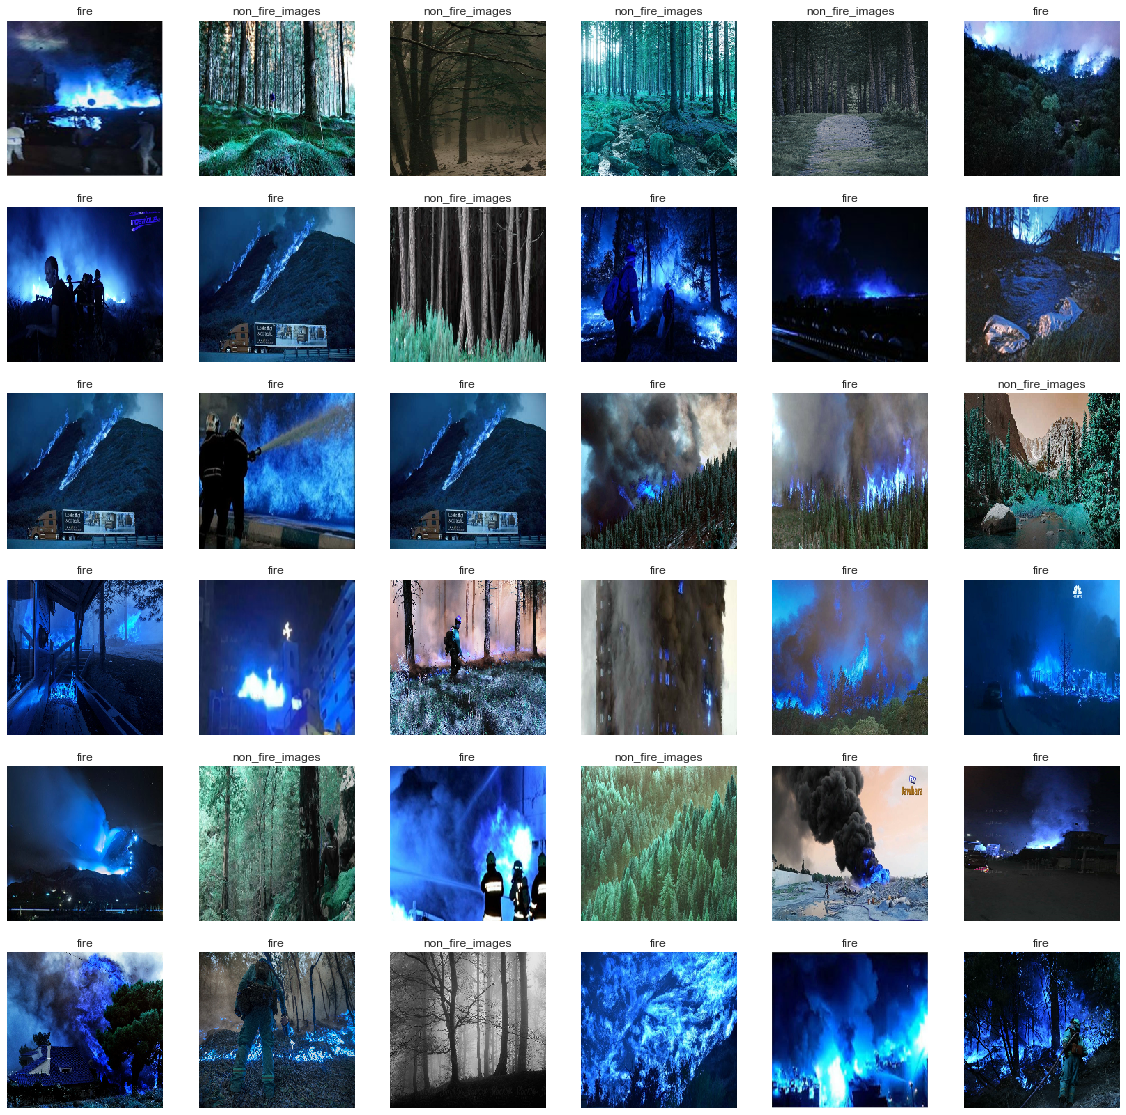

In [86]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [90]:
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(str('/Users/moham/test/' +folder + '/*' ) )
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [91]:
print(f'we have {len(X_test)} items in X_test')

we have 149 items in X_test


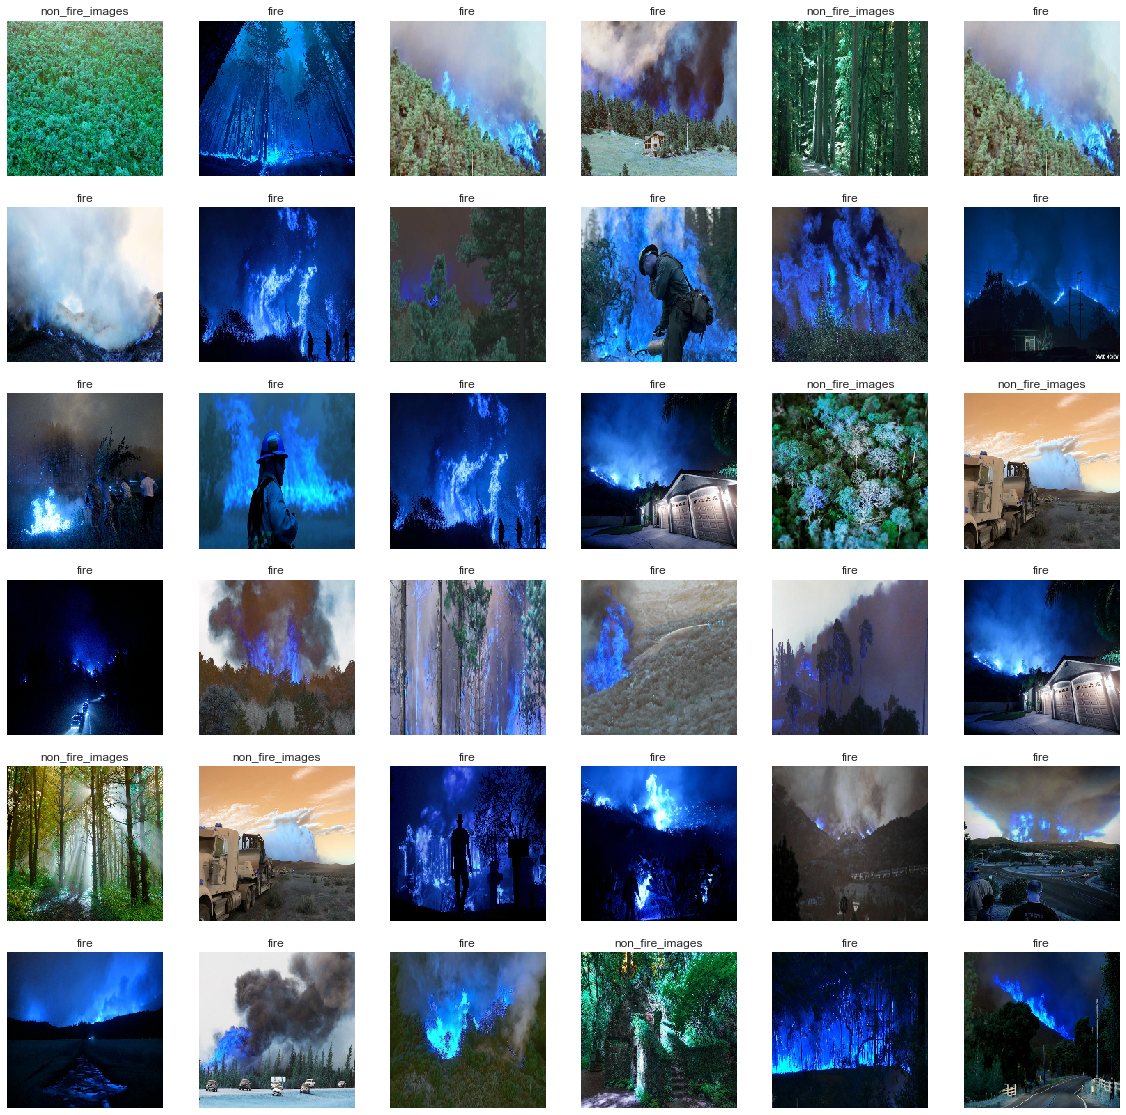

In [92]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [94]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (850, 224, 224, 3)
X_test shape  is (149, 224, 224, 3)
y_train shape  is (850,)
y_test shape  is (149,)


In [98]:
epochs = 50
ThisModel = model.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 119s 9s/step - loss: 2.2818 - accuracy: 0.5452
Epoch 2/50
14/14 [==============================] - 119s 9s/step - loss: 0.3253 - accuracy: 0.6502
Epoch 3/50
14/14 [==============================] - 138s 10s/step - loss: 0.1861 - accuracy: 0.6500
Epoch 4/50
14/14 [==============================] - 136s 10s/step - loss: 0.1046

KeyboardInterrupt: 

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))